- 0.Use the Iris dataset
- 1.Pick two classes of data (i.e., two species of Iris) and two features from the four in the dataset, so that the data for two species are linearly separable using the features that you have chosen.
- 2.Apply the Perceptron and Adaline models to the classes/feature that you have chosen and report your results.

In [1]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 0.laod the iris data
df = pd.read_csv('iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


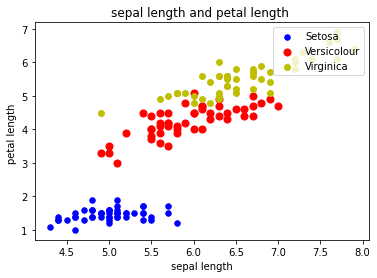

In [3]:
# Plotting the Iris data
from matplotlib import pyplot

iris_data = df
setosa_sepal_len = iris_data.iloc[:50, 0]
setosa_sepal_width = iris_data.iloc[:50, 2]

versi_sepal_len = iris_data.iloc[50:100, 0]
versi_sepal_width = iris_data.iloc[50:100, 2]

vergi_sepal_len = iris_data.iloc[100:, 0]
vergi_sepal_width = iris_data.iloc[100:, 2]

pyplot.scatter(setosa_sepal_len, setosa_sepal_width, marker = 'o', c = 'b',  s = 30, label = 'Setosa')
pyplot.scatter(versi_sepal_len, versi_sepal_width, marker = 'o', c = 'r',  s = 50, label = 'Versicolour')
pyplot.scatter(vergi_sepal_len, vergi_sepal_width, marker = 'o', c = 'y',  s = 35, label = 'Virginica')
pyplot.xlabel("sepal length")
pyplot.ylabel("petal length ")
pyplot.title("sepal length and petal length ")
pyplot.legend(loc = "upper right")

In [4]:
# 1. Pick two classes of data (i.e., two species of Iris) and two features (the data for two species are linearly separable)
# We extract the first 100 class labels that correspond to 50 Iris-Setosa and 50 Iris-Versicolor flowers.
X = df.iloc[0:100, [2,3]].values
y = df.iloc[0:100, 4].values 
Y = np.where(y == 'Iris-setosa', -1, 1)   # Versicolor as 1，Setosa as -1。
#print(X.shape,Y.shape)    #(100,2) (100,)

In [5]:
# prepard the Perceptron and AdalineSGD model
from numpy.random import seed
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
 
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
 
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta*(target - self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
 
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
 
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

class AdalineSGD(object):
    """
    ADAlineSGD Linear Neuron classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    errors_ : list
    Number of misclassifications in every epoch
    shuffle: bool (default :True) 
    """
    def __init__(self, eta=0.01, n_iter=10,shuffle = True,
                 random_state = None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialiezed = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)

    def _shuffle(self, X, y):
        """shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1+m)
        self.w_initialiezed = True

    def fit(self, X, y):
        '''
        Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features] X的形式是列表的列表
        Training vectors, where n_samples is the number of samples
        and n_features is the number of features.
        y : array-like, shape = [n_samples]
        Target values.
        Returns
        -------
        self : object
        '''
        self._initialize_weights(X.shape[1])
        self.cost_ =[] 
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X,y)
            cost = []
            for xi,target in zip(X,y):
                cost.append(self._update_weights(xi,target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data  without reinitializing the weights"""
        if not self.w_initialiezed:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi,target)
        else:
            self._update_weights(X, y)
        return self

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error ** 2
        return cost

    def net_input(self, X):
        """Calculate net input"""
        return (np.dot(X, self.w_[1:])+self.w_[0])

    def activation(self,X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [6]:
# train by the Perceptron
ppn = Perceptron(eta=0.001, n_iter=15)
ppn.fit(X, Y)
# train by the AdalineSGD
## standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, Y)

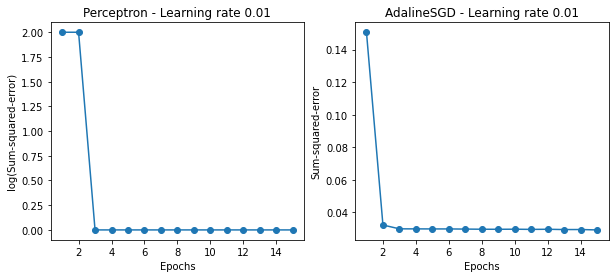

In [7]:
# plot the train error
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = ppn
ax[0].plot(range(1, len(ada1.errors_) + 1),  ppn.errors_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Perceptron - Learning rate 0.01')

ada2 = ada
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('AdalineSGD - Learning rate 0.01')

plt.show()
# plt.savefig('images/02_11.png', dpi=300)

In [8]:
from matplotlib.colors import ListedColormap
#Visualize the decision boundaries for 2D datasets
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max()) # 设置x轴的范围
    plt.ylim(xx2.min(), xx2.max()) # 设置y轴的范围
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):#除其中重复的元素，并按元素由大到小返回一个新的无元素重复的元组或者列表
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx), marker=markers[idx],label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Perceptron - Visualize:


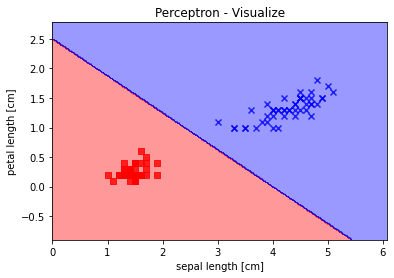

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


AdalineSGD - Visualize:


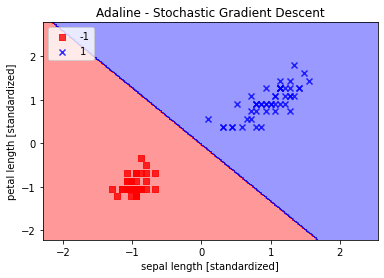

In [9]:
print('Perceptron - Visualize:')
plot_decision_regions(X, Y, classifier=ppn)
plt.title('Perceptron - Visualize')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

print('AdalineSGD - Visualize:')
plot_decision_regions(X_std, Y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

- 3.Use using three features at a time.

In [10]:
# We still extracting the first 100 class labels that correspond to 50 Iris-Setosa and 50 Iris-Versicolor flowers.
# this time we use three features at a time
X = df.iloc[0:100, 0:3].values
y = df.iloc[0:100, 4].values 
Y = np.where(y == 'Iris-setosa', -1, 1)   # Versicolor as 1，Setosa as -1。
print(X.shape,Y.shape) 

(100, 3) (100,)


In [11]:
# train by the Perceptron
ppn = Perceptron(eta=0.001, n_iter=50)
ppn.fit(X, Y)
# train by the AdalineSGD
## standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
ada = AdalineSGD(n_iter=50, eta=0.001, random_state=1)
ada.fit(X_std, Y)

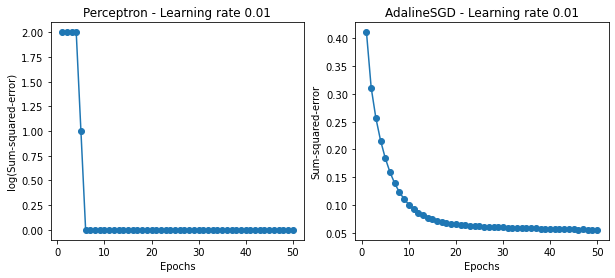

In [12]:
# plot the train error
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax[0].plot(range(1, len(ppn.errors_) + 1),  ppn.errors_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Perceptron - Learning rate 0.01')

ax[1].plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('AdalineSGD - Learning rate 0.01')

plt.show()
# plt.savefig('images/02_11.png', dpi=300)

In [13]:
# the AdalineSGD training does not converge
ada = AdalineSGD(n_iter=30, eta=0.01, random_state=1)
ada.fit(X_std, Y)

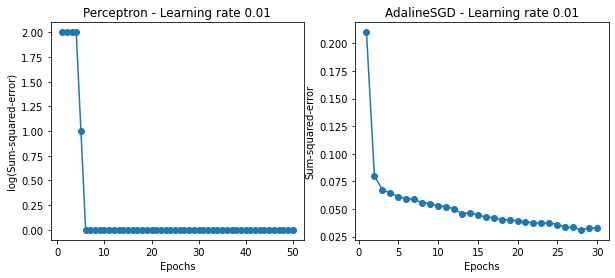

In [14]:
# plot the train error
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax[0].plot(range(1, len(ppn.errors_) + 1),  ppn.errors_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Perceptron - Learning rate 0.01')

ax[1].plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('AdalineSGD - Learning rate 0.01')

plt.show()

In [15]:
# Select some points to output the results
# Versicolor as 1，Setosa as -1。
def checkPoint(ran,classifier):
    if str(classifier.predict(X[ran])) == '-1':
        print('predict '+str(X[ran])+ ' is Setosa. ')
        if str(Y[ran]) == '-1':
            print('the predict is Right. ')
        else:
            print('the predict is Wrong. ')
    else:
        print('predict '+str(X[ran])+ ' is Versicolor. ')
        if str(Y[ran]) == '1':
            print('the predict is Right. ')
        else:
            print('the predict is Wrong. ')

In [16]:
from numpy import random
print('check the Perceptron predict:')
ran = random.randint(len(Y))
checkPoint(ran,ppn)
print('check the AdalineSGD predict:')
checkPoint(ran,ppn)

check the Perceptron predict:
predict [5.5 2.5 4. ] is Versicolor. 
the predict is Right. 
check the AdalineSGD predict:
predict [5.5 2.5 4. ] is Versicolor. 
the predict is Right. 


- 4.using all four features at the same time.

In [17]:
# We still extracting the first 100 class labels that correspond to 50 Iris-Setosa and 50 Iris-Versicolor flowers.
# this time we use three features at a time
X = df.iloc[0:100, 0:4].values
y = df.iloc[0:100, 4].values 
Y = np.where(y == 'Iris-setosa', -1, 1)   # Versicolor as 1，Setosa as -1。
print(X.shape,Y.shape) 

(100, 4) (100,)


In [18]:
# train by the Perceptron
ppn = Perceptron(eta=0.01, n_iter=15)
ppn.fit(X, Y)
# train by the AdalineSGD
## standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, Y)

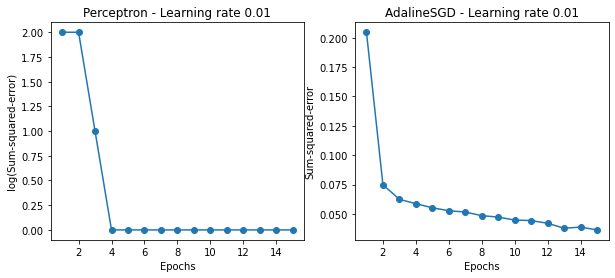

In [19]:
# plot the train error
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax[0].plot(range(1, len(ppn.errors_) + 1),  ppn.errors_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Perceptron - Learning rate 0.01')

ax[1].plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('AdalineSGD - Learning rate 0.01')

plt.show()

In [20]:
# Select some points to output the results
# Versicolor as 1，Setosa as -1。
def checkPoint(ran,classifier):
    if str(classifier.predict(X[ran])) == '-1':
        print('predict '+str(X[ran])+ ' is Setosa. ')
        if str(Y[ran]) == '-1':
            print('the predict is Right. ')
        else:
            print('the predict is Wrong. ')
    else:
        print('predict '+str(X[ran])+ ' is Versicolor. ')
        if str(Y[ran]) == '1':
            print('the predict is Right. ')
        else:
            print('the predict is Wrong. ')

In [21]:
from numpy import random
print('check the Perceptron predict:')
ran = random.randint(len(Y))
checkPoint(ran,ppn)
print('check the AdalineSGD predict:')
checkPoint(ran,ppn)

check the Perceptron predict:
predict [5.7 4.4 1.5 0.4] is Setosa. 
the predict is Right. 
check the AdalineSGD predict:
predict [5.7 4.4 1.5 0.4] is Setosa. 
the predict is Right. 


- 5.Pick two classes of data (i.e., two species of Iris) and two features from the four in the dataset, so that the data for two species are NOT linearly separable using the features that you have chosen.
- 6.Apply the Perceptron and Adaline models to the classes/features that you have chosen and report your results.

In [22]:
df2 = pd.read_csv('iris.data', header=None)
df2.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [23]:
# 1. Pick two classes of data (i.e., two species of Iris) and two features (the data for two species are linearly separable)
# We extract the last 100 class labels that correspond to 50 Iris-Versicolor and 50 Iris-Virginica flowers.
X2 = df2.iloc[50:, [0,2]].values
y2 = df2.iloc[50:, 4].values 
Y2 = np.where(y2 == 'Iris-virginica', -1, 1)   # Versicolor as 1，Virginica as -1。
print(X2.shape,Y2.shape)    #(100,2) (100,)

(100, 2) (100,)


In [24]:
Y2

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [32]:
# train by the Perceptron
ppn2 = Perceptron(eta=0.01, n_iter=40)
ppn2.fit(X2, Y2)
# train by the AdalineSGD
## standardize features
X2_std = np.copy(X2)
X2_std[:, 0] = (X2[:, 0] - X2[:, 0].mean()) / X2[:, 0].std()
X2_std[:, 1] = (X2[:, 1] - X2[:, 1].mean()) / X2[:, 1].std()
ada2 = AdalineSGD(n_iter=20, eta=0.01, random_state=1)
ada2.fit(X2_std, Y2)

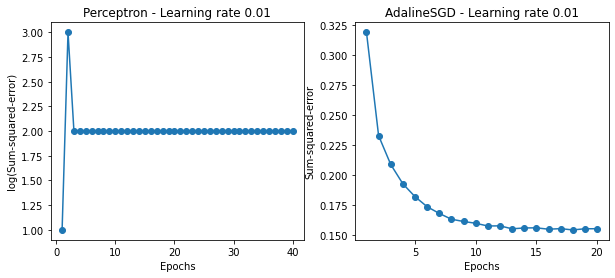

In [33]:
# plot the train error
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax[0].plot(range(1, len(ppn2.errors_) + 1),  ppn2.errors_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Perceptron - Learning rate 0.01')

ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('AdalineSGD - Learning rate 0.01')

plt.show()

In [34]:
from matplotlib.colors import ListedColormap
#Visualize the decision boundaries for 2D datasets
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max()) # 设置x轴的范围
    plt.ylim(xx2.min(), xx2.max()) # 设置y轴的范围
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):#除其中重复的元素，并按元素由大到小返回一个新的无元素重复的元组或者列表
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx), marker=markers[idx],label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Perceptron - Visualize:


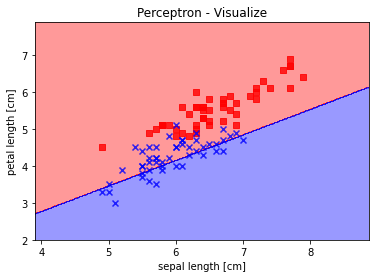

AdalineSGD - Visualize:


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


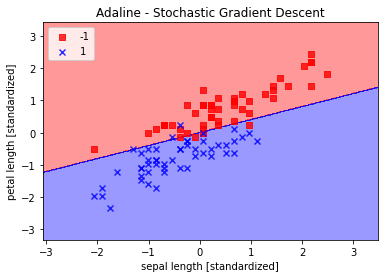

In [35]:
print('Perceptron - Visualize:')
plot_decision_regions(X2, Y2, classifier=ppn2)
plt.title('Perceptron - Visualize')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

print('AdalineSGD - Visualize:')
plot_decision_regions(X2_std, Y2, classifier=ada2)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()